red
channel_id 0
channel_id 1
channel_id 2


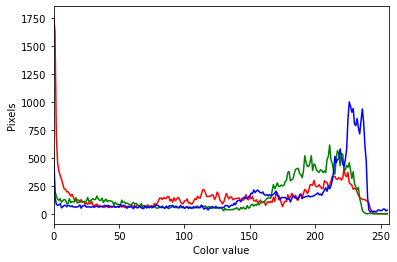

In [23]:
import sys
import skimage.io
import skimage.viewer
import numpy as np
from matplotlib import pyplot as plt


red_data = []
green_data = []
blue_data = []

# read original image, in full color, based on command
# line argument
image = skimage.io.imread(fname="car.png")

print(np.)

# display the image
viewer = skimage.viewer.ImageViewer(image)
viewer.show()

# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

print(colors[0])

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])

for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    print("channel_id", channel_id)
    if(channel_id == 0):
        red_data = np.copy(histogram)
    elif(channel_id == 1):
        green_data = np.copy(histogram)
    elif(channel_id == 2):
        blue_data = np.copy(histogram)
#     print(type(histogram))
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

In [35]:
print("red", red_data)

red_hex_data = np.copy(red_data).tolist()

for i in range(len(red_hex_data)):
    temp_dat = red_hex_data[i]
    print(temp_dat)
    red_hex_data[i] = hex(i)

print("red hex", red_hex_data)

    
print("green", green_data)
print("blue", blue_data)

red [1765 1622  698  454  380  342  308  266  222  222  197  198  182  159
  176  150  119  118  126  122  112  127  107  107   90   99   85   98
   89  112   82   71   80   88   72   74   67   63   58   59   69   76
   56   64   61   60   71   58   65   67   66   69   59   79   57   60
   67   64   70   69   77   66   65   61   81   69   68   74   76   73
   67   71   80   69   58   75   57   94   72   94  114  142  142  128
  147  140  136  155  154  116  132  105  144  119  129  149  137  109
   91   91  116  117  134   97  101   88   92  113  136  128  158  143
  141  179  218  214  189  156  156  158  156  172  164  128  150  194
  176  126  111   89  105  141  183  156  133  151  151  126  133  137
  139  140  142  108  124  123  136  172  131  126  157  135  156  116
  116  126  101  107  124  100  102  113   76   98  111  100  112  102
  149  111  185  188  127  146   97   65   99  114  112  171  146  149
  183  170  143  167  125  124  170  181  142  185  219  207  181  207
  

In [54]:
import matplotlib.pyplot as plt

from PIL import ImageColor

print(ImageColor.getcolor("#23a9dd", "RGB"))

hex_bars = np.arange(0, 16777215, 500000)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Data set
# height = [3, 12, 5, 18, 45]
height = np.ones(len(hex_bars))
# bars = ('A', 'B', 'C', 'D', 'E')
# bars = tuple(hex_bars)
bars = np.ones(len(hex_bars))
y_pos = np.arange(len(bars))

# Basic plot
barlist = plt.bar(y_pos, height, color=(0.9, 0.4, 0.6, 0.6))
for index in range(len(bars)):
#     barlist[index].set_color([i/256 for i in ImageColor.getcolor("#23a9dd", "RGB")])
    barlist[index].set_color([i/256 for i in ImageColor.getcolor("#" + format(hex_bars[index], '06x'), "RGB")])
# use the plt.xticks function to custom labels
# plt.xticks(y_pos, bars, color='orange', rotation=45, fontweight='bold', fontsize='2', horizontalalignment='right')

ax.bar(bars, height)

fig.set_figwidth(200)
fig.set_figheight(100)

plt.show()

f = plt.figure()
f.set_figwidth(100)
f.set_figheight(100)
 
# remo




(35, 169, 221)


<Figure size 7200x7200 with 0 Axes>

In [44]:
print("#" + format(15, '06x'))

#00000f


In [11]:
import sys
import skimage.io
import skimage.viewer
import numpy as np
from matplotlib import pyplot as plt
import math

red_data = []
green_data = []
blue_data = []

# read original image, in full color, based on command
# line argument
image = skimage.io.imread(fname="bluec1.png")

print(np.shape(image))

red = image[:,:,0].flatten().tolist()
green = image[:,:,1].flatten().tolist()
blue = image[:,:,2].flatten().tolist()

# print(red[0])
# print(blue[0])
# print(green[0])

color_distance = 256

# colors = ["#" + format( (int((red[i] << 16)  + (green[i] << 8) + (blue[i] << 0)) // color_distance) * color_distance , '06x') for i in range(len(blue)) ]

# colors_raw = [ (int((red[i] << 16)  + (green[i] << 8) + (blue[i] << 0)) // color_distance) * color_distance  for i in range(len(blue)) ]


pixels = [[red[i], green[i], blue[i]] for i in range(len(blue))]



def check_if_list_contains_similar_color(list_most_neighbors, pixel, allowed_distance):
    
    for val in list_most_neighbors:
        if(euclidean_distance_two_pixels(val[0], pixel) < allowed_distance):
            return True
    
    return False




def euclidean_distance_two_pixels(pixel1, pixel2):
    red_diff = pow((pixel1[0] - pixel2[0]), 2)
    green_diff = pow((pixel1[1] - pixel2[1]), 2)
    blue_diff = pow((pixel1[2] - pixel2[2]), 2)
    
    distance = math.sqrt(red_diff + green_diff + blue_diff)
    
    return distance

distance_allowed = 24

most_neighbors = []


for i in range(len(pixels)):
    
    global most_neighbors
    global distance_allowed
    
    current_pixel = pixels[i]
    number_similar = 0
    if(check_if_list_contains_similar_color(most_neighbors, current_pixel, distance_allowed)):
        continue
    for j in range(len(pixels)):
        if(j == i):
            continue
        else:
            compare_pixel = pixels[j]
            distance = euclidean_distance_two_pixels(current_pixel, compare_pixel)
            if(distance<distance_allowed):
                number_similar += 1
    most_neighbors.append([current_pixel, number_similar, "%"+str((number_similar/len(pixels)) * 100)])
            
# print(max(val[1] for val in most_neighbors))

most_neighbors.sort(key = lambda i: i[1])

most_neighbors.reverse()

# print(most_neighbors)

most_neighbors_maximum = []

number_unique_colors = 10

total_percent = 0

range_cursor = 0

while(len(most_neighbors_maximum) < number_unique_colors and total_percent < 100):
    if(len(most_neighbors_maximum) == 0):
        most_neighbors_maximum.append(most_neighbors[0])
        total_percent += (most_neighbors[0][1]/len(pixels))*100
        range_cursor += 1
    else:
        
        for i in range(range_cursor, len(most_neighbors)):
            if(i == len(most_neighbors) - 1):
                total_percent = 100
                break
            
            #if similar to a color already in the maximum array then just continue
            if([euclidean_distance_two_pixels(most_neighbors[i][0], most_neighbors_maximum[j][0]) < (distance_allowed+64) for j in range(len(most_neighbors_maximum))].count(True) >= 1):
                continue
            else:
                if(total_percent + (most_neighbors[i][1]/len(pixels))*100 >= 100):
                    total_percent += (most_neighbors[i][1]/len(pixels))*100
                    break
                most_neighbors_maximum.append(most_neighbors[i])
                total_percent += (most_neighbors[i][1]/len(pixels))*100
                range_cursor = i
                if(len(most_neighbors_maximum) == number_unique_colors):
                    break
                
                
print(np.shape(most_neighbors_maximum))
print(most_neighbors_maximum)



    

print("red", red[0:10])
print("green", green[0:10])
print("blue", blue[0:10])
print("pixels",pixels[0:10])

# print("new", colors_new[0:10])

# print("colors raw", colors_raw[0:10])

# print(max(red))
# print(red[0:10])
# red = ["#"+format(red[i], '06x') for i in range(len(red))]
# green = ["#"+format(green[i], '06x') for i in range(len(green))]
# blue = ["#"+format(blue[i], '06x') for i in range(len(blue))]

# print(red[0][5:7])

# colors = []

# for i in range(len(blue)):
#     colors.append("#" + red[i][5:7] + green[i][5:7] + blue[i][5:7])

# print("old", colors[0:10])

# print(type(colors[1]))

# print(colors[1] == '#82c7e7')

def int_to_hex(int_to_conv):
    
    return "#" + format(int_to_conv, '06x')

# print(int_to_hex(25500))

# color_distance = 64

# print(len(colors))



# colors = [(int(color)//int(color_distance) * color_distance) for color in colors]

# print(len(colors))

# index_check = colors.index('#82c7e7')


# print(colors.count('#245d80'))

# import matplotlib.pyplot as plt
#   # deterministic random data

# _ = plt.hist(colors_raw, bins='auto')  # arguments are passed to np.histogram
# plt.title("Histogram with 'auto' bins")

# plt.show()

(64, 64, 3)
(7, 3)
[[[204, 210, 224], 976, '%23.828125'], [[128, 120, 119], 492, '%12.01171875'], [[12, 18, 25], 157, '%3.8330078125'], [[0, 142, 206], 92, '%2.24609375'], [[109, 183, 235], 30, '%0.732421875'], [[0, 72, 116], 26, '%0.634765625'], [[100, 55, 32], 2, '%0.048828125']]
red [155, 162, 167, 172, 176, 181, 185, 188, 191, 195]
green [165, 170, 175, 180, 184, 188, 192, 195, 198, 201]
blue [187, 191, 196, 199, 203, 207, 210, 212, 214, 217]
pixels [[155, 165, 187], [162, 170, 191], [167, 175, 196], [172, 180, 199], [176, 184, 203], [181, 188, 207], [185, 192, 210], [188, 195, 212], [191, 198, 214], [195, 201, 217]]


In [12]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

# figure(figsize=(40, 36), dpi=80)

# x = np.arange(0,16777215,color_distance)

x = np.arange(0, len(most_neighbors_maximum))

y = []

#append frequency to y
for pixel_dat in most_neighbors_maximum:
    y.append(pixel_dat[1])

# y = np.asarray([colors_raw.count(x_val) for x_val in x])

print(len(y))

# remove_zero_indices = np.where(y <= 5)[0]

# x = np.delete(x, remove_zero_indices)
# y = np.delete(y, remove_zero_indices)

# print(y[0:10])

# print(remove_zero_indices)

print(len(y))

N = len(x)

# print( len([ImageColor.getcolor(int_to_hex(i), "RGB") for i in range(len(x))]) )

colors2 = [int_to_hex(x_val) for x_val in x]

colors2 = []

for pixel_dat in most_neighbors_maximum:
    red_pix = pixel_dat[0][0] << 16
    green_pix = pixel_dat[0][1] << 8
    blue_pix = pixel_dat[0][2] 
    
    color_pix = red_pix + green_pix + blue_pix
    
    colors2.append(int_to_hex(color_pix))

# print(colors2)
# area = 100 # 0 to 15 point radii

# plt.figure(figsize=(8, 8))
# plt.scatter(x, y, s=area, c=colors2, alpha=0.5)
# plt.show()

7
7


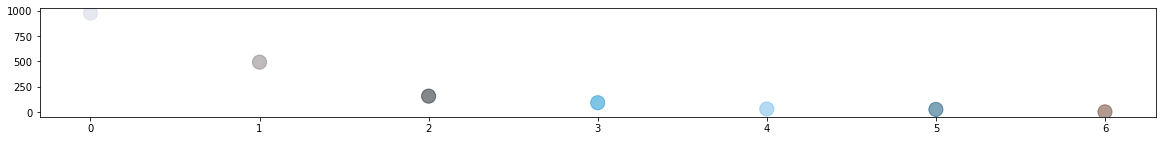

In [13]:
area = 200

plt.figure(figsize=(20, 2))
plt.scatter(x, y, s=area, c=colors2, alpha=0.5)
plt.show()

In [ ]:
mydat = np.delete(np.asarray([0, 1, 2, 3, 4, 5]), [0,1,2,3])
print(mydat)

In [152]:
dats = np.arange(0,16777215,64)

my_data = [0, 62, 63, 64, 67, 128, 129, 199, 200]

my_data = [int(i)//int(64) * 64 for i in my_data]

print(my_data)

[0, 0, 0, 64, 64, 128, 128, 192, 192]


In [147]:
print(int(62)//int(64))

0


In [165]:
my_dat = int(hex(255 << 16), 16)


print(my_dat)

my_dat = int(hex(255 << 8), 16)

print(my_dat)

16711680
65280


In [171]:
print(hex( (253 << 16) + (253 << 0) ))
print(hex(253 << 8))
print(hex(253 << 16))


0xfd00fd
0xfd00
0xfd0000


In [172]:
print(255 << 16)

16711680


In [199]:
print(pow(10, 2))

100


In [202]:
import math

math.sqrt(100)

10.0

In [ ]:
my